In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset
df= pd.read_csv('Cricket.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
df.shape

(79, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
#checking null values
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [7]:
col = ['Ave','SR']
df_1 = df[col].astype(float)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
#scaling features
Scaler = StandardScaler()
df_1=Scaler.fit_transform(df_1)

In [10]:
df_1 = pd.DataFrame(df_1)

In [11]:
df_1.head()

,0,1
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [12]:
df_1.columns = [col]

In [13]:
df_1.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [14]:
# model building
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5, random_state = 100)
model.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

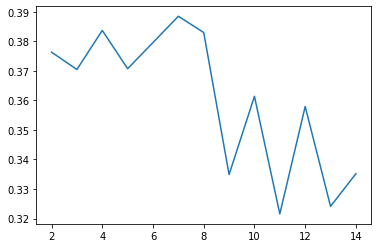

In [15]:
#silhouette
from sklearn.metrics import silhouette_score
sse = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k,random_state=100).fit(df_1)
    sse.append([k, silhouette_score(df_1, kmeans.labels_)])
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])

In [16]:
# sum of squares
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 50, random_state = 100)
    model_clus.fit(df_1)
    ssd.append(model_clus.inertia_)

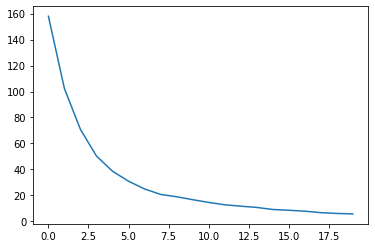

In [17]:
plt.plot(ssd)

In [18]:
# we can make clusters ranging 3 to 5 so we wil make 4 clusters

In [19]:
#final model building
finalmodel = KMeans(n_clusters = 4, random_state = 100)
finalmodel.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

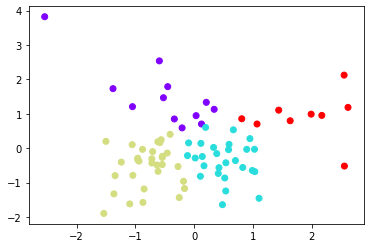

In [20]:
plt.scatter(df_1.iloc[:,0],df_1.iloc[:,1], c=finalmodel.labels_, cmap='rainbow')